In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset, info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete5QEB48/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [5]:
type(dataset)

list

In [6]:
def split_dataset(dataset, train_r, val_r, test_r):
  size = len(dataset)
  train_dataset = dataset.take(int(train_r * size))

  val_t_dataset = dataset.skip(int(train_r * size))
  val_dataset = val_t_dataset.take(int(val_r * size))

  test_dataset = val_t_dataset.skip(int(val_r * size))

  return train_dataset, test_dataset, val_dataset

In [7]:
train, test, val = split_dataset(dataset[0], 0.8, 0.1, 0.1)

In [8]:
list(train.take(1))

[(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
  array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=1>

In [9]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# **VISUALIZATION**

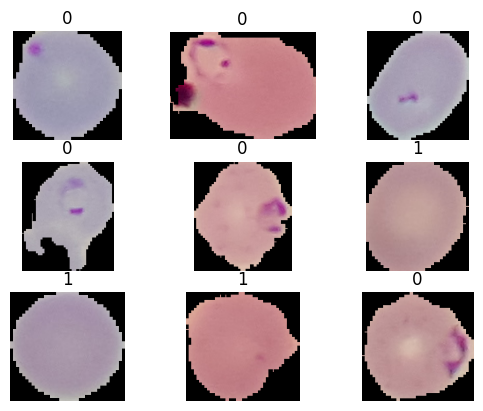

In [10]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(str(label.numpy()))
  plt.imshow(img);

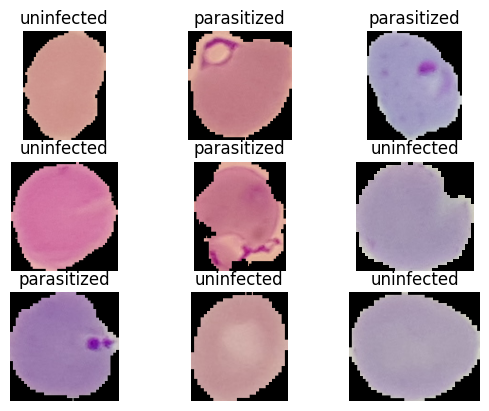

In [11]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(info.features['label'].int2str(label))
  plt.imshow(img);

In [12]:
# 0 - parasitized
# 1 - uninfected

# **PREPROCESSING**

In [13]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE)) / 255.0, label

In [14]:
train = train.map(resize_rescale)
val = val.map(resize_rescale)
test = test.map(resize_rescale)

In [15]:
for i, l in train.take(1):
  print(i, l)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [16]:
train = train.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val = val.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test = test.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

# **MODEL BUILDING**

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [18]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics='accuracy'
)

In [20]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=20,
    verbose=1
)

Epoch 1/20
689/689 [==============================] - 91s 115ms/step - loss: 0.3183 - accuracy: 0.8692 - val_loss: 0.5376 - val_accuracy: 0.6969
Epoch 2/20
689/689 [==============================] - 44s 64ms/step - loss: 0.2027 - accuracy: 0.9335 - val_loss: 0.9820 - val_accuracy: 0.5328
Epoch 3/20
689/689 [==============================] - 42s 61ms/step - loss: 0.1901 - accuracy: 0.9369 - val_loss: 1.3486 - val_accuracy: 0.5034
Epoch 4/20
689/689 [==============================] - 52s 76ms/step - loss: 0.1736 - accuracy: 0.9442 - val_loss: 9.9406 - val_accuracy: 0.5666
Epoch 5/20
689/689 [==============================] - 41s 59ms/step - loss: 0.1679 - accuracy: 0.9454 - val_loss: 0.7837 - val_accuracy: 0.5114
Epoch 6/20
689/689 [==============================] - 45s 65ms/step - loss: 0.1585 - accuracy: 0.9484 - val_loss: 0.3634 - val_accuracy: 0.8069
Epoch 7/20
689/689 [==============================] - 41s 59ms/step - loss: 0.1450 - accuracy: 0.9520 - val_loss: 0.2510 - val_accuracy

In [21]:
model.evaluate(test)

2757/2757 [==============================] - 21s 4ms/step - loss: 0.2088 - accuracy: 0.9322


[0.20876146852970123, 0.9321726560592651]

In [22]:
y_pred = model.predict(test)

2757/2757 [==============================] - 19s 3ms/step


In [23]:
y_pred

array([[7.02863336e-02],
       [3.37954611e-01],
       [9.98352647e-01],
       ...,
       [1.19521925e-02],
       [5.41030033e-07],
       [9.76313412e-01]], dtype=float32)

In [24]:
def parasite_or_not(img):
  if img < 0.5:
    return 'P😔'
  else:
    return 'U'

In [25]:
y_pred

array([[7.02863336e-02],
       [3.37954611e-01],
       [9.98352647e-01],
       ...,
       [1.19521925e-02],
       [5.41030033e-07],
       [9.76313412e-01]], dtype=float32)

In [26]:
result_labels = []

for i in y_pred:
  result_labels.append(parasite_or_not(i[0]))

In [27]:
result_labels[:5]

['P😔', 'P😔', 'U', 'U', 'P😔']

In [28]:
len(result_labels)

2757

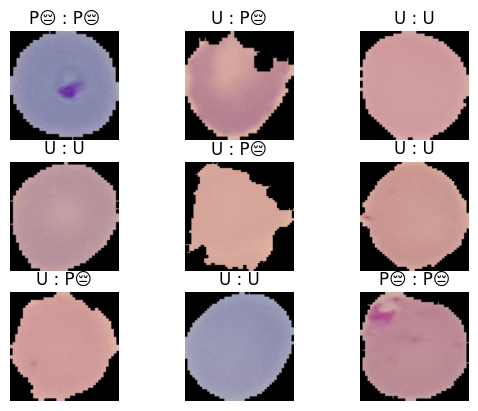

In [29]:
for i, (img, label) in enumerate(test.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(f'{parasite_or_not(label.numpy()[0])} : {str(result_labels[i])}')
  plt.imshow(img[0]);

# **FUNCTIONAL API**

In [30]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [31]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='lenet model')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)
func_output = Dense(1, activation='sigmoid')(x)

model = Model(func_input, func_output, name='lenet model')

In [32]:
model.summary()

Model: "lenet model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lenet model (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)      

In [33]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='features_extr')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)


feature_extractor = Model(func_input, output, name='features_extr')

In [34]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='lenet model')

x = feature_extractor(func_input)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)
func_output = Dense(1, activation='sigmoid')(x)

model = Model(func_input, func_output, name='lenet model')

In [35]:
model.summary()

Model: "lenet model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lenet model (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 features_extr (Functional)  (None, 54, 54, 16)        1136      
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                       

In [36]:
"""x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)"""

"x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)\nx = BatchNormalization()(x)\nx = MaxPool2D(pool_size=2, strides=2)(x)\nx = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)\nx = BatchNormalization()(x)\noutput = MaxPool2D(pool_size=2, strides=2)(x)"

In [37]:
from tensorflow.keras.layers import Layer

In [38]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size, strides * 2)
    self.conv_2 = Conv2D(filters=filters * 2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size, strides * 2)
  def call(self, x):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)
    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x


feature_sub_clssd = FeatureExtractor(8, 3, 1, 'valid', 'relu', 2)

In [39]:
class Lenet(Model):
  def __init__(self, activation, output_activation):
    super(Lenet, self).__init__()
    self.feature_extractor = feature_sub_clssd

    self.dense_1 = Dense(100, activation=activation)
    self.flatten = Flatten()
    self.batch = BatchNormalization()
    self.dense_2 = Dense(10, activation=activation)
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation=output_activation)

  def call(self, x):

    """
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(10, activation='relu')(x)
    x = BatchNormalization()(x)
    func_output = Dense(1, activation='sigmoid')(x)
    """
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet = Lenet('relu', 'sigmoid')
lenet(tf.zeros([1, 224, 224, 3]))
lenet.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (Feature  multiple                  0 (unused)
 Extractor)                                                      
                                                                 
 dense_9 (Dense)             multiple                  15052900  
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 batch_normalization_14 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_15 (Ba  multiple                  40    

In [40]:
lenet.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [41]:
hist = lenet.fit(
    train,
    validation_data=val,
    epochs=20,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


689/689 [==============================] - 40s 56ms/step - loss: 0.0000e+00 - accuracy: 0.6168 - val_loss: 0.0000e+00 - val_accuracy: 0.6566
Epoch 2/20
689/689 [==============================] - 39s 56ms/step - loss: 0.0000e+00 - accuracy: 0.6095 - val_loss: 0.0000e+00 - val_accuracy: 0.6236
Epoch 3/20
689/689 [==============================] - 38s 55ms/step - loss: 0.0000e+00 - accuracy: 0.6139 - val_loss: 0.0000e+00 - val_accuracy: 0.6439
Epoch 4/20
689/689 [==============================] - 38s 56ms/step - loss: 0.0000e+00 - accuracy: 0.6143 - val_loss: 0.0000e+00 - val_accuracy: 0.6069
Epoch 5/20
689/689 [==============================] - 46s 67ms/step - loss: 0.0000e+00 - accuracy: 0.6217 - val_loss: 0.0000e+00 - val_accuracy: 0.4936
Epoch 6/20
689/689 [==============================] - 39s 56ms/step - loss: 0.0000e+00 - accuracy: 0.6272 - val_loss: 0.0000e+00 - val_accuracy: 0.5920
Epoch 7/20
689/689 [==============================] - 38s 56ms/step - loss: 0.0000e+00 - accuracy: 

<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>